## Design 2D CNN Classification
### 1. One existing standard dataset from MNIST, CIFAR10, CIFAR100, MNIST-Fashion
### 2. Second should be a custom dataset (you design your own by taking pics from mobile or something, any multi-classification problem). Apply data augmentation, increase overall samples, apply same CNN model on this. 

#### Sub-tasks:
1. Comparative study with different hyperparameters (learning rate, epochs, batch size, optimizer, activation function, convo layer numbers, regularizer/dropout). Also train acc, train loss, val acc, val loss. 
2. Have a plot of accuracies and losses. 
3. Use CSVLogger class from keras if tensorflow

In [56]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.callbacks import EarlyStopping, CSVLogger
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import pickle
from myLogger import CSVLoggerV2
import datetime

In [57]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [58]:
print(f"Length of training data: {len(x_train)}")
print(f"Length of training labels: {len(y_train)}")
print(f"Length of testing data: {len(x_test)}")
print(f"Length of testing labels: {len(y_test)}")
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of testing data: {x_test.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")
print(f"Type of training data: {type(x_train)}")
print(f"Type of testing data: {type(x_test)}")
print(f"Type of training labels: {type(y_train)}")
print(f"Type of testing labels: {type(y_test)}")

Length of training data: 60000
Length of training labels: 60000
Length of testing data: 10000
Length of testing labels: 10000
Shape of training data: (60000, 28, 28, 1)
Shape of testing data: (10000, 28, 28, 1)
Shape of training labels: (60000, 10)
Shape of testing labels: (10000, 10)
Type of training data: <class 'numpy.ndarray'>
Type of testing data: <class 'numpy.ndarray'>
Type of training labels: <class 'numpy.ndarray'>
Type of testing labels: <class 'numpy.ndarray'>


In [19]:
# Create and configure a CSVLogger
csv_logger = CSVLogger('MNIST_training.csv', separator=',', append=True)

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [39]:
mylogger = CSVLoggerV2('MNIST Comparative Study.csv', fieldnames=['batch_size', 'total_epochs', 'epoch', 'learning_rate', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
# Define hyperparameters
learning_rates = (0.0001, 0.001, 0.01)
epochs = (50, 25, 15)
batch_sizes = (32, 32, 32)

In [25]:
histories = []

for learning_rate, epoch, batch_size in zip(learning_rates, epochs, batch_sizes):
    # Create a Sequential model
    model = Sequential()

    # Add layers to the model
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    optim = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        x_train, 
        y_train, 
        epochs=epoch, 
        batch_size=batch_size, 
        validation_data=(x_test, y_test),
        callbacks=[csv_logger, early_stopping],
        verbose=1
    )

    histories.append(history)

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_accuracy * 100:.5f}%', end='\n\n')

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6202 - accuracy: 0.8482 - val_loss: 0.3184 - val_accuracy: 0.9135
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.9195 - val_loss: 0.2535 - val_accuracy: 0.9295
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2408 - accuracy: 0.9342 - val_loss: 0.2161 - val_accuracy: 0.9390
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2071 - accuracy: 0.9425 - val_loss: 0.1926 - val_accuracy: 0.9453
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1818 - accuracy: 0.9491 - val_loss: 0.1731 - val_accuracy: 0.9510
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1621 - accuracy: 0.9547 - val_loss: 0.1581 - val_accuracy: 0.9559
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9590 - val_loss: 0.1466 - val_accuracy:

In [40]:
for history in histories:
    train_losses = history.history['loss']
    train_accuracies = history.history['accuracy']
    val_losses = history.history['val_loss']
    val_accuracies = history.history['val_accuracy']
    # print(f"{histories.index(history)} => {len(train_losses)} {len(train_accuracies)} {len(val_losses)} {len(val_accuracies)}")
    # Constants are batch size, epoch, learning rate. We get these by taking index of history in histories, and then using the values at the same index of the hyperparameter tuples
    epoch = 1
    for i in range(len(train_losses)):
        mylogger.log({
            'batch_size': batch_sizes[histories.index(history)],
            'total_epochs': epochs[histories.index(history)],
            'epoch': epoch,
            'learning_rate': learning_rates[histories.index(history)],
            'loss': train_losses[i],
            'accuracy': train_accuracies[i],
            'val_loss': val_losses[i],
            'val_accuracy': val_accuracies[i]
        })
        epoch += 1

In [ ]:
def get_last_df(losses, epochs):
    l = len(losses)
    return losses.iloc[l-epochs:, :]

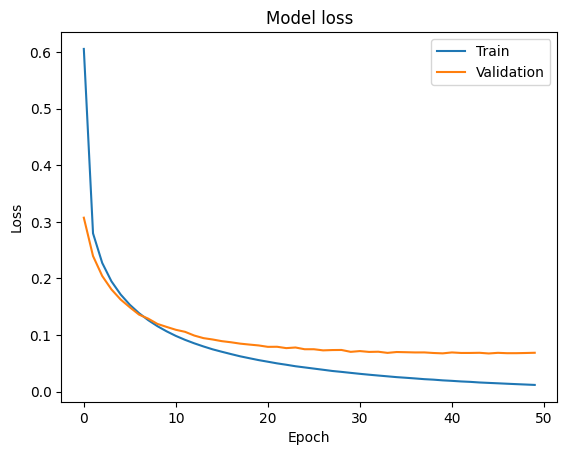

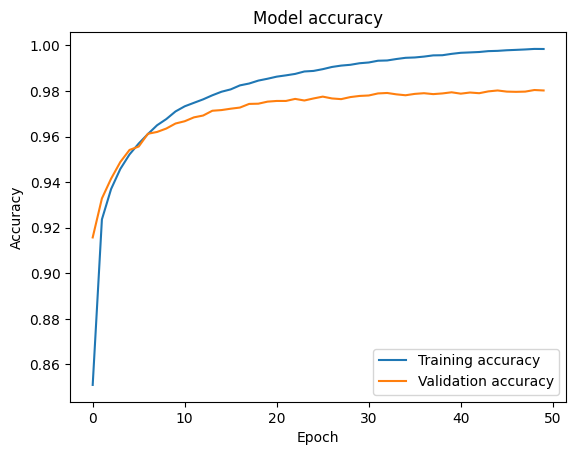

In [ ]:
losses = get_last_df(pd.read_csv('MNIST_training.csv', engine='pyarrow'), epochs)

# Plot the training and validation loss
plt.plot(losses["epoch"], losses['loss'], label='Training loss')
plt.plot(losses["epoch"], losses['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# Plot the training and validation accuracy
plt.plot(losses["epoch"], losses['accuracy'], label='Training accuracy')
plt.plot(losses["epoch"], losses['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
with open('ML_Lab5_Model.pkl', 'rb') as file:
    model = pickle.load(file)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.5f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9802
Test accuracy: 98.02000%


Custom Dataset

In [14]:
import os
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array
from myLogger import CSVLoggerV2
from keras.callbacks import CSVLogger, EarlyStopping
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import *
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [15]:
# Create and configure a CSVLogger
csv_logger = CSVLogger('Custom_training.csv', separator=',', append=True)

# Create an EarlyStopping callback
patience = 5
early_stopping = EarlyStopping(monitor='val_loss', patience=patience)

In [16]:
# Define the path to the dataset directory
dataset_dir = 'Dataset'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through the subdirectories (classes) in the dataset directory
for class_i, class_name in enumerate(os.listdir(dataset_dir)):
    class_dir = os.path.join(dataset_dir, class_name)
    
    if os.path.isdir(class_dir):
        # Loop through the images in each class directory
        for image_file in os.listdir(class_dir):
            if image_file.endswith('.jpg'):
                image_path = os.path.join(class_dir, image_file)
                images.append(image_path)
                labels.append(class_i)

# Convert image paths to NumPy arrays
images = [img_to_array(load_img(image, target_size=(28, 28))) for image in images]

# Normalize pixel values to the range [0, 1]
images = np.array(images) / 255.0
images = images[:, :, :, 0]

# Convert labels to one-hot encoding
labels = to_categorical(labels)

# Now, 'images' contains the preprocessed images, and 'labels' contains their corresponding one-hot encoded class labels.


In [17]:
print(images.shape)
print(labels.shape)
print(images[0][0].shape)

(1120, 28, 28)
(1120, 10)
(28,)


In [18]:
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

# Check the shapes to make sure everything is correct
print("Train set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)
print(f"Type of x_train: {type(x_train)}")
print(f"Type of y_train: {type(y_train)}")
print(f"Type of x_val: {type(x_val)}")
print(f"Type of y_val: {type(y_val)}")
print(f"Type of x_test: {type(x_test)}")
print(f"Type of y_test: {type(y_test)}")

Train set: (784, 28, 28) (784, 10)
Validation set: (168, 28, 28) (168, 10)
Test set: (168, 28, 28) (168, 10)
Type of x_train: <class 'numpy.ndarray'>
Type of y_train: <class 'numpy.ndarray'>
Type of x_val: <class 'numpy.ndarray'>
Type of y_val: <class 'numpy.ndarray'>
Type of x_test: <class 'numpy.ndarray'>
Type of y_test: <class 'numpy.ndarray'>


In [19]:
mylogger = CSVLoggerV2('Custom dataset Comparative Study.csv', fieldnames=['batch_size', 'total_epochs', 'patience', 'epoch', 'learning_rate', 'loss', 'accuracy', 'val_loss', 'val_accuracy', 'fin_accuracy'])

In [20]:
# Define hyperparameters
learning_rates = (0.0001, 0.001, 0.001)
total_epochs = (100, 75, 50)
batch_sizes = (32, 32, 32)

In [21]:
def getmodel():
    # Initialize sequential model
    model = Sequential()

    # Add layers to the model
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    optim = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
histories = []
accuracies = []
count = 1
for learning_rate, epoch, batch_size in zip(learning_rates, total_epochs, batch_sizes):
    # Create a Sequential model
    model = getmodel()
    
    # Train the model
    history = model.fit(
        x_train, 
        y_train, 
        epochs=epoch, 
        batch_size=batch_size, 
        validation_data=(x_test, y_test),
        callbacks=[csv_logger, early_stopping],
        verbose=1
    )

    histories.append(history)

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    acc = round(test_accuracy * 100, 5)
    print(f'Test accuracy: {acc}%', end='\n\n')
    accuracies.append(acc)
    with open(f"models/custom_model_{count}.pkl", 'wb') as file:
        pickle.dump(model, file)
        count += 1

Epoch 1/100


25/25 [==============================] - 1s 10ms/step - loss: 2.3220 - accuracy: 0.1020 - val_loss: 2.3067 - val_accuracy: 0.1131
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2938 - accuracy: 0.1212 - val_loss: 2.2901 - val_accuracy: 0.1071
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2809 - accuracy: 0.1429 - val_loss: 2.2794 - val_accuracy: 0.1369
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2746 - accuracy: 0.1390 - val_loss: 2.2713 - val_accuracy: 0.1369
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 2.2611 - accuracy: 0.1454 - val_loss: 2.2656 - val_accuracy: 0.1369
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2506 - accuracy: 0.1492 - val_loss: 2.2510 - val_accuracy: 0.1726
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 2.2454 - accuracy: 0.1798 - val_loss: 2.2470 - val_accuracy: 0.1845
Epoch 8/100
25/25 [=====

In [23]:
for history in histories:
    train_losses = history.history['loss']
    train_accuracies = history.history['accuracy']
    val_losses = history.history['val_loss']
    val_accuracies = history.history['val_accuracy']
    # print(f"{histories.index(history)} => {len(train_losses)} {len(train_accuracies)} {len(val_losses)} {len(val_accuracies)}")
    # Constants are batch size, epoch, learning rate. We get these by taking index of history in histories, and then using the values at the same index of the hyperparameter tuples
    epoch = 1
    hist = histories.index(history)
    for i in range(len(train_losses)):
        mylogger.log({
            'batch_size': batch_sizes[hist],
            'total_epochs': total_epochs[hist],
            'patience': patience,
            'epoch': epoch,
            'learning_rate': learning_rates[hist],
            'loss': train_losses[i],
            'accuracy': train_accuracies[i],
            'val_loss': val_losses[i],
            'val_accuracy': val_accuracies[i],
            'fin_accuracy': accuracies[hist]
        })
        epoch += 1

In [24]:
def get_last_df(losses, total_so_far, current_number):
    # l = len(losses)
    return losses.iloc[total_so_far : total_so_far+current_number,:]



COMBINATION RESULT 1: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   epoch         100 non-null    int64  
 1   accuracy      100 non-null    float64
 2   loss          100 non-null    float64
 3   val_accuracy  100 non-null    float64
 4   val_loss      100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB
None


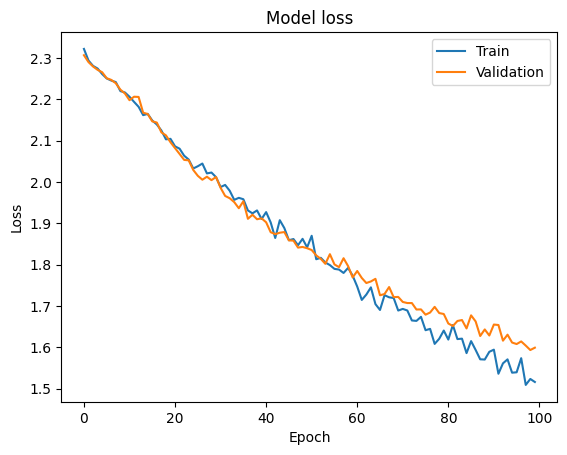

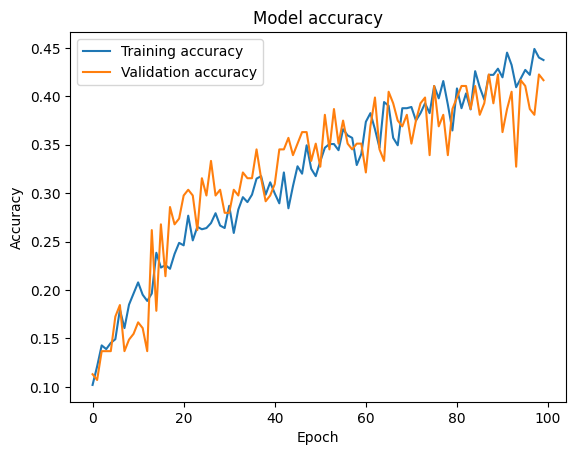



COMBINATION RESULT 2: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 100 to 159
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   epoch         60 non-null     int64  
 1   accuracy      60 non-null     float64
 2   loss          60 non-null     float64
 3   val_accuracy  60 non-null     float64
 4   val_loss      60 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB
None


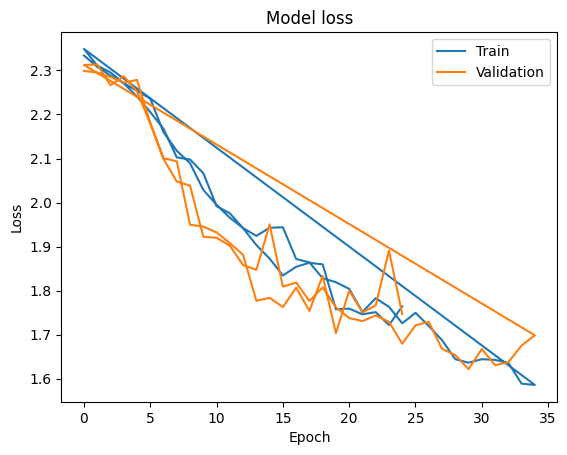

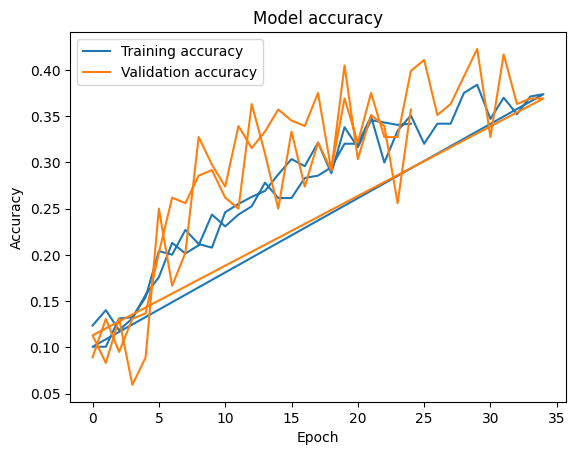



COMBINATION RESULT 3: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   epoch         0 non-null      int64  
 1   accuracy      0 non-null      float64
 2   loss          0 non-null      float64
 3   val_accuracy  0 non-null      float64
 4   val_loss      0 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 132.0 bytes
None


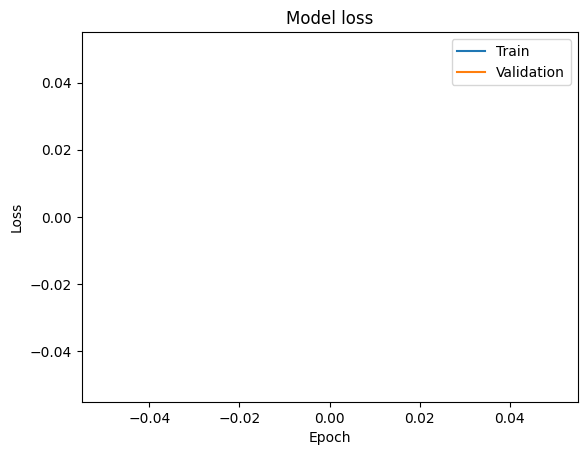

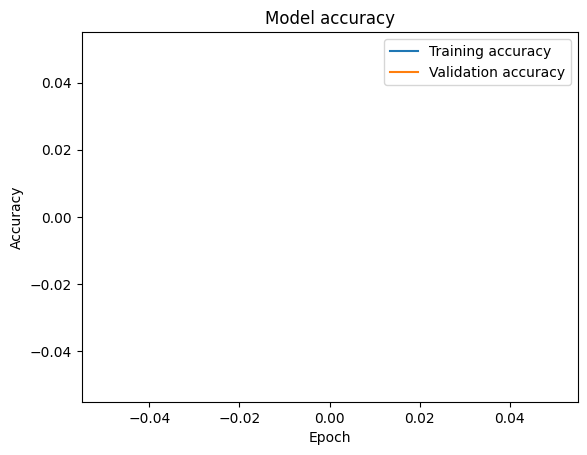

In [28]:
lossdf = pd.read_csv('Custom_training.csv', engine='pyarrow')
loss_dfs = []
total_so_far = 0
for i in range(3):
    loss_dfs.append(get_last_df(lossdf, total_so_far, total_epochs[i]))
    total_so_far += total_epochs[i]

n = 1
for losses in loss_dfs:
    print(f"\n\nCOMBINATION RESULT {n}: ", end='\n\n')
    print(losses.info())
    # Plot the training and validation loss
    plt.plot(losses["epoch"], losses['loss'], label='Training loss')
    plt.plot(losses["epoch"], losses['val_loss'], label='Validation loss')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()


    # Plot the training and validation accuracy
    plt.plot(losses["epoch"], losses['accuracy'], label='Training accuracy')
    plt.plot(losses["epoch"], losses['val_accuracy'], label='Validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    n += 1

In [26]:
# with open('ML_Lab5_Custom_Dataset_Model.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Evaluate the model on the test data
# test_loss, test_accuracy = model.evaluate(x_test, y_test)
# print(f'Test accuracy: {test_accuracy * 100:.5f}%')